# Exploratory Data Analysis (EDA) for Feedback Data

For this notebook, I will analyze **feedback data** from the **[Baku Higher Oil School Cinema Club](https://www.instagram.com/bhoscinema.club/)**.  

The goal is to understand participant satisfaction, identify what they appreciated most, and highlight areas for improvement. This analysis will help the club improve the overall movie session experience.

---

## Data Source

We will use cleaned and preprocessed feedback dataset:

---

### **Feedback Data** *(processed_feedback_data.csv)*

Contains individual feedback submissions with the following fields:

- **`session_id`**  
  Unique identifier for the movie session.

- **`feedback_date`**  
  Timestamp when the feedback was submitted.

- **`satisfaction_rating`**  
  Numeric rating (typically 1–5) reflecting participant satisfaction.

- **`liked_aspects_category`**  
  The specific aspect of the event the participant liked most. Categories include:
  - **Environment:** Ambiance, atmosphere, comfort, overall vibe.
  - **Movie Selection:** Choice of film, genre, plot/theme aspects.
  - **Organization:** Event management, sound/visual quality, seating, preparation.
  - **Overall Positive:** General satisfaction not tied to a specific aspect.
  - **Other:** Any other positive feedback that doesn't fit predefined categories.

- **`areas_for_improvement_category`**  
  Suggestions for improvement or issues noticed. Categories include:
  - **Positive Feedback (No Improvement Needed):** Explicitly states satisfaction or that no improvements are necessary (e.g., "everything was perfect").
  - **Logistics and Quality:** Venue comfort, technical quality (sound, projector, lighting), overall event quality.
  - **Movie Selection:** Suggestions or issues related to film choice or genre.
  - **Timing:** Scheduling, start/end times, punctuality.
  - **Other:** Default category for suggestions not matching defined keywords.

### 1. Import the Libraries

In [147]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


In [148]:
# Seaborn theme
sns.set_theme(
    style='darkgrid',
    palette='muted'
)

# Matplotlib rcParams
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.color': 'lightgray',
})

### 2. Load the Data 

In [149]:
feedback_df = pd.read_csv(r"C:\Users\avaza\Desktop\BHOS Cinema Club Data Analysis Project\data\processed\processed_feedback_data.csv")

In [150]:
feedback_df.head()

,session_id,feedback_date,satisfaction_rating,liked_aspects_category,areas_for_improvement_category
0,1,2023-10-20 21:18:11.605,5,Overall Positive,Logistics and Quality
1,1,2023-10-20 21:18:17.436,5,Other,Positive Feedback (No Improvement Needed)
2,1,2023-10-20 21:18:19.383,5,Environment,Movie Selection
3,1,2023-10-20 21:18:32.931,5,Movie Selection,Logistics and Quality
4,1,2023-10-20 21:18:50.588,4,Environment,Movie Selection


### 3. General Understanding of the Data

- **Data Types and Info**
- **Missing Values**
- **Descriptive Statistics**
- **Unique Categories**

In [151]:
feedback_df.info()
# feedback_date is object -> Convert to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   session_id                      215 non-null    int64 
 1   feedback_date                   215 non-null    object
 2   satisfaction_rating             215 non-null    int64 
 3   liked_aspects_category          215 non-null    object
 4   areas_for_improvement_category  215 non-null    object
dtypes: int64(2), object(3)
memory usage: 8.5+ KB


In [152]:
feedback_df['feedback_date'] = pd.to_datetime(feedback_df['feedback_date'], format="%Y-%m-%d %H:%M:%S.%f")

feedback_df['feedback_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: feedback_date
Non-Null Count  Dtype         
--------------  -----         
215 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 KB


In [153]:
print("Missing Values in Feedback Data:")
print(feedback_df.isnull().sum())

Missing Values in Feedback Data:
session_id                        0
feedback_date                     0
satisfaction_rating               0
liked_aspects_category            0
areas_for_improvement_category    0
dtype: int64


In [154]:
print("Descriptive Statistics for Feedback Data")
feedback_df.describe()

Descriptive Statistics for Feedback Data


,session_id,feedback_date,satisfaction_rating
count,215.000000,215,215.000000
mean,6.181395,2024-05-17 21:54:46.978372352,4.479070
min,1.000000,2023-10-20 21:18:11.605000,1.000000
25%,3.000000,2023-11-23 21:56:13.958500096,4.000000
50%,6.000000,2024-02-16 21:09:52.211000064,5.000000
75%,10.000000,2024-12-27 21:49:21.262000128,5.000000
max,13.000000,2025-05-20 22:10:09.692000,5.000000
std,4.067150,NaN,0.946355


In [155]:
# Unique Categories
print("Liked Aspects:", feedback_df['liked_aspects_category'].unique().tolist())
print("Areas for Improvement:", feedback_df['areas_for_improvement_category'].unique().tolist())

Liked Aspects: ['Overall Positive', 'Other', 'Environment', 'Movie Selection', 'No Feedback', 'Organization']
Areas for Improvement: ['Logistics and Quality', 'Positive Feedback (No Improvement Needed)', 'Movie Selection', 'No Feedback', 'Other', 'Timing']


### 4. Visualizations

### Univariate Analysis:
**Univariate analysis** examines the distribution of a single variable at a time.

- Shape of the numaric variables
- Frequency of the categorical variables

### Satisfaction Rating Distribution

,Satisfaction Rating,Count,Percentage %
0,5,147,68.37
1,4,43,20.00
2,3,12,5.58
3,2,7,3.26
4,1,6,2.79


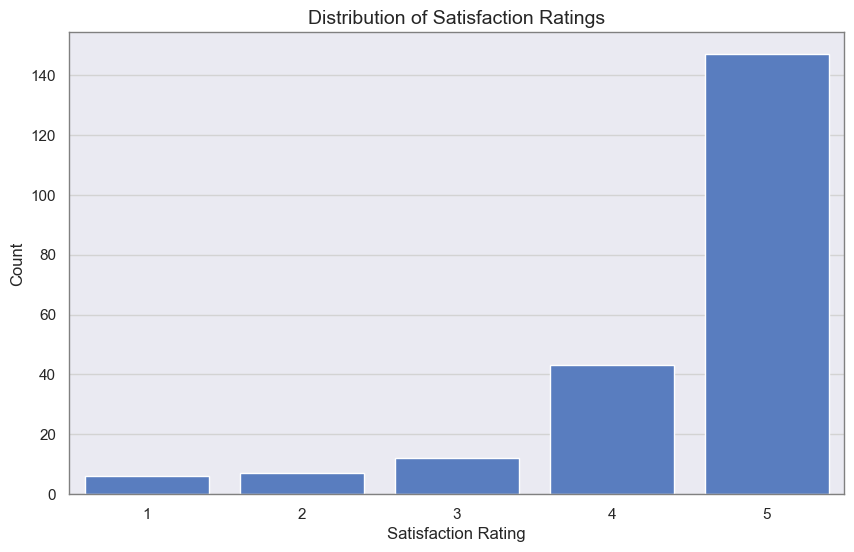

In [169]:
# Table
rating_table = feedback_df['satisfaction_rating'].value_counts().reset_index()
rating_table.columns = ['Satisfaction Rating', 'Count']
rating_table['Percentage %'] = ((rating_table['Count'] / rating_table['Count'].sum()) * 100).round(2)

display(rating_table)

# Graph
sns.countplot(x='satisfaction_rating', data=feedback_df)
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count') 
plt.show()

### **Observations**

**147 ratings of 5 (68%):**  
The majority of participants were extremely satisfied with the movie session, providing a perfect satisfaction rating of 5.

**43 ratings of 4 (20%):**  
The second-largest group expressed satisfaction, though with slightly less enthusiasm than those rating it a 5.

**12 ratings of 3 (5.58%), 7 ratings of 2 (3.26%), and 6 ratings of 1 (2.79%):**  
The dissatisfaction ratings represent a small portion of the total feedback, indicating that negative experiences were rare.

Overall, the vast majority of participants enjoyed the movie sessions, with a significant portion providing *5-star ratings*, reflecting positive engagement.

### Liked Aspects Distribution

,Liked Aspects,Count,Percentage %
0,Movie Selection,76,35.35
1,Environment,47,21.86
2,Overall Positive,42,19.53
3,Organization,25,11.63
4,Other,20,9.30
5,No Feedback,5,2.33


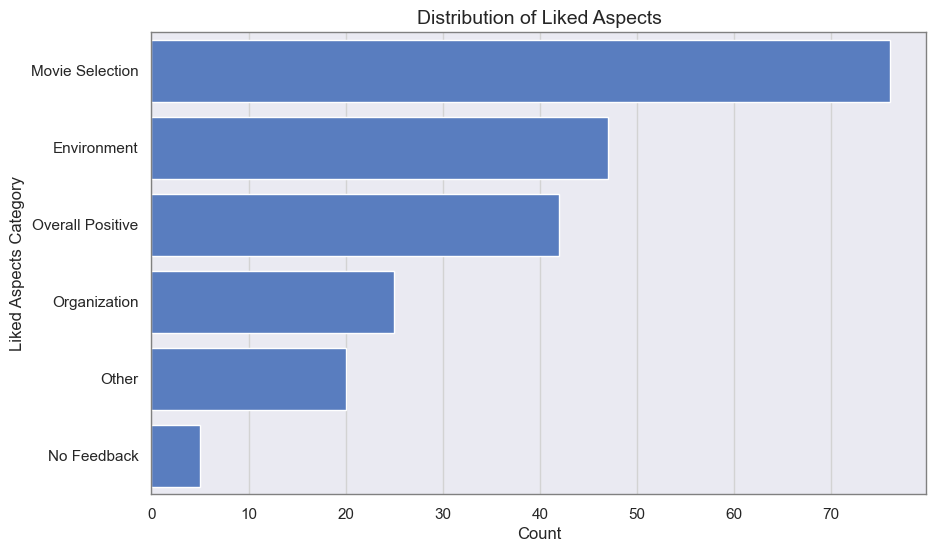

In [170]:
# Table
liked_table = feedback_df['liked_aspects_category'].value_counts().reset_index()
liked_table.columns = ['Liked Aspects', 'Count']
liked_table['Percentage %'] = ((liked_table['Count'] / liked_table['Count'].sum()) * 100).round(2)

display(liked_table)

# Graph
sns.countplot(y='liked_aspects_category', data=feedback_df, order=feedback_df['liked_aspects_category'].value_counts().index)
plt.title('Distribution of Liked Aspects')
plt.xlabel('Count')
plt.ylabel('Liked Aspects Category')
plt.show()

### **Observations**

**76 responses for Movie Selection (35.35%)**:  
  The most frequently appreciated aspect of the movie sessions was the movie selection, with a significant portion of participants expressing positive feedback regarding the choice of movies.

**47 responses for Environment (21.86%)**:  
  The next largest group appreciated the **environment**, referring to the ambiance, comfort, and overall atmosphere of the session space.

**42 responses for Overall Positive (19.53%)**:  
  Many participants expressed general satisfaction with the sessions, indicating a positive overall experience without focusing on a specific aspect.

**25 responses for Organization (11.63%)**:  
  Some feedback focused on the **organization** of the sessions, including aspects like sound, visual quality, and seating arrangements.

**20 responses for Other (9.30%)**:  
  A small portion of participants provided feedback in an **uncategorized "Other"** category, which could involve comments not fitting into the predefined categories.

**5 responses for No Feedback (2.33%)**:  
  A very small portion of respondents did not provide any feedback related to specific aspects, indicating that a few participants may not have expressed their views.


### Areas for Improvement Distribution

,Area for Improvement,Count,Percentage %
0,Positive Feedback (No Improvement Needed),104,48.37
1,Logistics and Quality,46,21.40
2,Movie Selection,26,12.09
3,Other,21,9.77
4,No Feedback,15,6.98
5,Timing,3,1.40


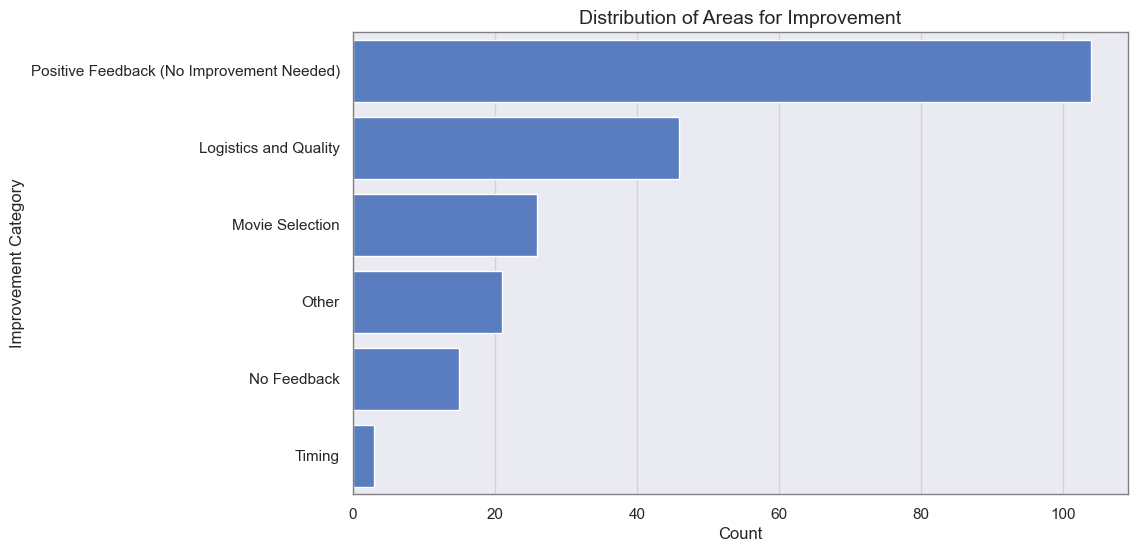

In [171]:
# Table
improvement_table = feedback_df['areas_for_improvement_category'].value_counts().reset_index()
improvement_table.columns = ['Area for Improvement', 'Count']
improvement_table['Percentage %'] = ((improvement_table['Count'] / improvement_table['Count'].sum()) * 100).round(2)

display(improvement_table)

# Graph
sns.countplot(y='areas_for_improvement_category', data=feedback_df, order=feedback_df['areas_for_improvement_category'].value_counts().index)
plt.title('Distribution of Areas for Improvement')
plt.xlabel('Count')
plt.ylabel('Improvement Category')
plt.show()

### **Observations**

**104 responses for Positive Feedback (No Improvement Needed) (48.37%)**:  
  The largest portion of participants expressed that they were satisfied with the session and felt no improvements were needed, indicating that many had a very positive overall experience.

**46 responses for Logistics and Quality (21.40%)**:  
  A significant portion of participants suggested improvements related to **logistics and quality**, such as seating, sound, and visual quality of the session.

**26 responses for Movie Selection (12.09%)**:  
  Some participants recommended changes in the **movie selection**, indicating that the movie choices might not have been entirely to their liking or there could be better options.

**21 responses for Other (9.77%)**:  
  A small portion of respondents provided feedback in an **uncategorized "Other"** category, which might include suggestions not covered by the predefined categories.

**15 responses for No Feedback (6.98%)**:  
  A few participants did not provide specific feedback on areas for improvement, indicating either general satisfaction or lack of suggestions.

**3 responses for Timing (1.40%)**:  
  Only a small portion of participants raised concerns about the **timing** of the movie sessions, such as the start time, duration, or schedule.


### Average Rating for Each Movie Session

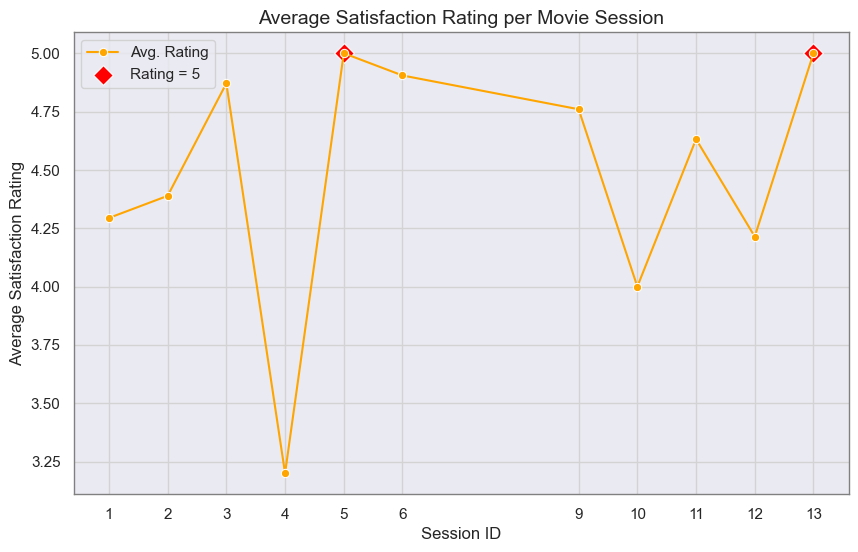

In [160]:
avg_rating_per_session = feedback_df.groupby('session_id')['satisfaction_rating'].mean()
perfect_sessions = avg_rating_per_session[avg_rating_per_session == 5]

sns.lineplot(x=avg_rating_per_session.index, y=avg_rating_per_session.values, marker='o', color='orange', label='Avg. Rating')
sns.scatterplot(x=perfect_sessions.index, y=perfect_sessions.values, marker='D', color='red', s=100, label='Rating = 5')

plt.title('Average Satisfaction Rating per Movie Session')
plt.xlabel('Session ID')
plt.ylabel('Average Satisfaction Rating')

plt.xticks(ticks=avg_rating_per_session.index)

plt.legend()
plt.show()

### **Observations**

**Session 5 and 13**: Both sessions received the **perfect score** of **5**, indicating that participants were extremely satisfied with these movie sessions.
  
**Session 3 (4.87)**: This session also received a high average rating, suggesting that the movie and/or session quality was well-received by most participants.

**Session 6 (4.90)**: Another highly rated session, reflecting positive feedback from the majority of participants.

**Session 4 (3.20)**: This session received the lowest rating among the sessions, indicating that there might have been significant issues with this particular session, which led to a lower satisfaction level.

**Other sessions**: The remaining sessions received average ratings ranging from **4.00 to 4.76**, showing generally positive feedback with most sessions being well-received but not reaching the level of the top-rated sessions.
